Twitter Sentiment Analysis

Importing Libraries

In [3]:
!pip install fastai
from fastai.text import * 

# fastai needs us to specify a path sometimes
from pathlib import Path

# Import usual data science libraries
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

Loading the dataset

In [7]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tango911/airline-sentiment-tweets")

print("Path to dataset files:", path)

100%|██████████| 227k/227k [00:00<00:00, 261kB/s]

Extracting files...
Path to dataset files: C:\Users\Namratha Sai\.cache\kagglehub\datasets\tango911\airline-sentiment-tweets\versions\1


In [17]:
import pandas as pd

# Read the CSV file from the ZIP archive directly
df_full = pd.read_csv("C:\\Users\\Namratha Sai\\Downloads\\Tweets.csv.zip", compression='zip')

# Check the shape or contents
print("Shape:", df_full.shape)
df_full.head()


Shape: (14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [18]:
df_full.size

219600

In [19]:
pd.set_option('display.max_colwidth', 0)

Selecting only Sentiments and Tweet

In [20]:
df = df_full[['airline_sentiment', 'text']]
df.sample(10)

,airline_sentiment,text
658,neutral,@united can someone please explain the process of of what happens to property found on a plane after passengers leave at Heathrow ?
13176,negative,@AmericanAir now the second flight I was put on was Cancelled Flightled with no explanation!! Missed my first meeting!!#outraged😡😡
2172,negative,"@united it's 9:56, and the desk attendant stated we would ""sit awhile"" until given the all clear. Lack of communication seems to the norm."
14124,negative,@AmericanAir flight 3056 still sitting at DFW waiting for baggage to be loaded
3478,neutral,@united Trying to locate passenger that landed 2 hrs ago in @HeathrowAirport UA938. can you assist? Is flight still in customs? PLEASE help
2103,negative,@united 25 minute hold is 1 hr. 25 min. @ABC11_WTVD
10115,negative,"@USAirways @ALfamilyoffour maybe if there was anyone answering the phone they would. ""Please call back Late Flightr"".For 18 hours? Not good enough"
4277,neutral,@united that's what I thought! Thanks for the clarification!
1040,negative,"@united This must be a drone “@united: @KeamBleam We understand your frustration. Our Bag team is working hard to get your bag(s) to you..."""
13440,neutral,"@AmericanAir I hear #Delta is offering 2,500 miles to frequent flyers if their bags doesn't come out within 20 minutes of landing thoughts?"


Checking NULL values

In [21]:
df[['airline_sentiment', 'text']].isna().sum()

airline_sentiment    0
text                 0
dtype: int64

In [22]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [23]:
df['airline_sentiment'].value_counts(normalize=True)

airline_sentiment
negative    0.626913
neutral     0.211680
positive    0.161407
Name: proportion, dtype: float64

Relationship between Airline and Sentiments

<Axes: xlabel='count', ylabel='airline'>

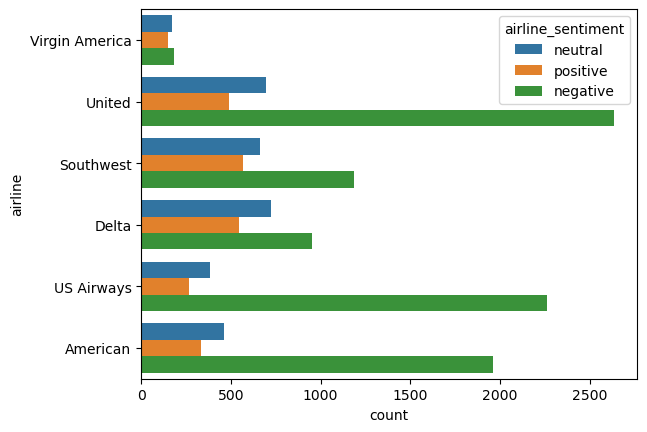

In [24]:
sns.countplot(y='airline', hue='airline_sentiment', data=df_full)

Converting to Lowercase

In [25]:
df["text_lower"] = df["text"].str.lower()
df.head()

C:\Users\Namratha Sai\AppData\Local\Temp\ipykernel_47296\2065095683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_lower"] = df["text"].str.lower()


,airline_sentiment,text,text_lower
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,@virginamerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,@virginamerica i didn't today... must mean i need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","@virginamerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it,@virginamerica and it's a really big bad thing about it


Importing Libaries

In [26]:
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

Removal of String Punctuation

This is again a text standardization process that will help to treat 'chirag' and 'chirag!' in the same way. We also need to carefully choose the list of punctuations to exclude depending on the use case. For example, the string.punctuation in python contains the following punctuation symbols !"#$%&'()*+,-./:;<=>?@[\]^_ {|}~` We can add or remove more punctuations as per our need.

In [27]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text_lower"].apply(lambda text: remove_punctuation(text))
df.head()

,airline_sentiment,text,text_lower,text_wo_punct
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.,virginamerica what dhepburn said
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,@virginamerica plus you've added commercials to the experience... tacky.,virginamerica plus youve added commercials to the experience tacky
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,@virginamerica i didn't today... must mean i need to take another trip!,virginamerica i didnt today must mean i need to take another trip
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","@virginamerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",virginamerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4,negative,@VirginAmerica and it's a really big bad thing about it,@virginamerica and it's a really big bad thing about it,virginamerica and its a really big bad thing about it


In [28]:
df.columns

Index(['airline_sentiment', 'text', 'text_lower', 'text_wo_punct'], dtype='object')

In [29]:
df.head()

,airline_sentiment,text,text_lower,text_wo_punct
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.,virginamerica what dhepburn said
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,@virginamerica plus you've added commercials to the experience... tacky.,virginamerica plus youve added commercials to the experience tacky
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,@virginamerica i didn't today... must mean i need to take another trip!,virginamerica i didnt today must mean i need to take another trip
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","@virginamerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",virginamerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4,negative,@VirginAmerica and it's a really big bad thing about it,@virginamerica and it's a really big bad thing about it,virginamerica and its a really big bad thing about it


Removal of Frequent Words

In [30]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_punct"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('to', 8640),
 ('the', 6050),
 ('i', 5372),
 ('a', 4476),
 ('united', 4117),
 ('you', 4105),
 ('for', 3991),
 ('flight', 3870),
 ('on', 3778),
 ('and', 3709)]

In [31]:
df.head()

,airline_sentiment,text,text_lower,text_wo_punct
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.,virginamerica what dhepburn said
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,@virginamerica plus you've added commercials to the experience... tacky.,virginamerica plus youve added commercials to the experience tacky
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,@virginamerica i didn't today... must mean i need to take another trip!,virginamerica i didnt today must mean i need to take another trip
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","@virginamerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",virginamerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4,negative,@VirginAmerica and it's a really big bad thing about it,@virginamerica and it's a really big bad thing about it,virginamerica and its a really big bad thing about it


In [32]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(6)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text_wo_stopfreq"] = df["text_wo_punct"].apply(lambda text: remove_freqwords(text))
df.head()

,airline_sentiment,text,text_lower,text_wo_punct,text_wo_stopfreq
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.,virginamerica what dhepburn said,virginamerica what dhepburn said
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,@virginamerica plus you've added commercials to the experience... tacky.,virginamerica plus youve added commercials to the experience tacky,virginamerica plus youve added commercials experience tacky
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,@virginamerica i didn't today... must mean i need to take another trip!,virginamerica i didnt today must mean i need to take another trip,virginamerica didnt today must mean need take another trip
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","@virginamerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",virginamerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,virginamerica its really aggressive blast obnoxious entertainment in your guests faces amp they have little recourse
4,negative,@VirginAmerica and it's a really big bad thing about it,@virginamerica and it's a really big bad thing about it,virginamerica and its a really big bad thing about it,virginamerica and its really big bad thing about it


Removal of Rare words

In [33]:
# Drop the two columns which are no more needed 
df.drop(["text_wo_punct"], axis=1, inplace=True)

n_rare_words = 100
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["text_wo_freqrare"] = df["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))
df.head()


,airline_sentiment,text,text_lower,text_wo_stopfreq,text_wo_freqrare
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.,virginamerica what dhepburn said,virginamerica what dhepburn said
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,@virginamerica plus you've added commercials to the experience... tacky.,virginamerica plus youve added commercials experience tacky,virginamerica plus youve added commercials experience tacky
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,@virginamerica i didn't today... must mean i need to take another trip!,virginamerica didnt today must mean need take another trip,virginamerica didnt today must mean need take another trip
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","@virginamerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",virginamerica its really aggressive blast obnoxious entertainment in your guests faces amp they have little recourse,virginamerica its really aggressive blast obnoxious entertainment in your guests faces amp they have little recourse
4,negative,@VirginAmerica and it's a really big bad thing about it,@virginamerica and it's a really big bad thing about it,virginamerica and its really big bad thing about it,virginamerica and its really big bad thing about it


In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Namratha
[nltk_data]     Sai\AppData\Roaming\nltk_data...


True

Stemming

Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. There are several type of stemming algorithms available and one of the famous one is porter stemmer which is widely used. We can use nltk package for the same.

In [35]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text_wo_freqrare"].apply(lambda text: stem_words(text))
df.head()


,airline_sentiment,text,text_lower,text_wo_stopfreq,text_wo_freqrare,text_stemmed
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.,virginamerica what dhepburn said,virginamerica what dhepburn said,virginamerica what dhepburn said
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,@virginamerica plus you've added commercials to the experience... tacky.,virginamerica plus youve added commercials experience tacky,virginamerica plus youve added commercials experience tacky,virginamerica plu youv ad commerci experi tacki
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,@virginamerica i didn't today... must mean i need to take another trip!,virginamerica didnt today must mean need take another trip,virginamerica didnt today must mean need take another trip,virginamerica didnt today must mean need take anoth trip
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","@virginamerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",virginamerica its really aggressive blast obnoxious entertainment in your guests faces amp they have little recourse,virginamerica its really aggressive blast obnoxious entertainment in your guests faces amp they have little recourse,virginamerica it realli aggress blast obnoxi entertain in your guest face amp they have littl recours
4,negative,@VirginAmerica and it's a really big bad thing about it,@virginamerica and it's a really big bad thing about it,virginamerica and its really big bad thing about it,virginamerica and its really big bad thing about it,virginamerica and it realli big bad thing about it


In [38]:
import nltk
from nltk.stem import WordNetLemmatizer

# You may need to download the WordNet data once
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Now perform lemmatization
print("Word is : stripes")
print("Lemma result for verb : ", lemmatizer.lemmatize("stripes", 'v'))
print("Lemma result for noun : ", lemmatizer.lemmatize("stripes", 'n'))


Word is : stripes
Lemma result for verb :  strip
Lemma result for noun :  stripe


In [39]:
df.head(10)

,airline_sentiment,text,text_lower,text_wo_stopfreq,text_wo_freqrare,text_stemmed
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.,virginamerica what dhepburn said,virginamerica what dhepburn said,virginamerica what dhepburn said
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,@virginamerica plus you've added commercials to the experience... tacky.,virginamerica plus youve added commercials experience tacky,virginamerica plus youve added commercials experience tacky,virginamerica plu youv ad commerci experi tacki
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,@virginamerica i didn't today... must mean i need to take another trip!,virginamerica didnt today must mean need take another trip,virginamerica didnt today must mean need take another trip,virginamerica didnt today must mean need take anoth trip
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","@virginamerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",virginamerica its really aggressive blast obnoxious entertainment in your guests faces amp they have little recourse,virginamerica its really aggressive blast obnoxious entertainment in your guests faces amp they have little recourse,virginamerica it realli aggress blast obnoxi entertain in your guest face amp they have littl recours
4,negative,@VirginAmerica and it's a really big bad thing about it,@virginamerica and it's a really big bad thing about it,virginamerica and its really big bad thing about it,virginamerica and its really big bad thing about it,virginamerica and it realli big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,@virginamerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying va,virginamerica seriously would pay 30 flight for seats that didnt have this playing its really only bad thing about flying va,virginamerica seriously would pay 30 flight for seats that didnt have this playing its really only bad thing about flying va,virginamerica serious would pay 30 flight for seat that didnt have thi play it realli onli bad thing about fli va
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)","@virginamerica yes, nearly every time i fly vx this “ear worm” won’t go away :)",virginamerica yes nearly every time fly vx this “ear worm” won’t go away,virginamerica yes nearly every time fly vx this “ear worm” won’t go away,virginamerica ye nearli everi time fli vx thi “ear worm” won’t go away
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP","@virginamerica really missed a prime opportunity for men without hats parody, there. https://t.co/mwpg7grezp",virginamerica really missed prime opportunity for men without hats parody there httpstcomwpg7grezp,virginamerica really missed prime opportunity for men without hats parody there httpstcomwpg7grezp,virginamerica realli miss prime opportun for men without hat parodi there httpstcomwpg7grezp
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D","@virginamerica well, i didn't…but now i do! :-d",virginamerica well didnt…but now do d,virginamerica well didnt…but now do d,virginamerica well didnt…but now do d
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.","@virginamerica it was amazing, and arrived an hour early. you're too good to me.",virginamerica it was amazing and arrived an hour early youre too good me,virginamerica it was amazing and arrived an hour early youre too good me,virginamerica it wa amaz and arriv an hour earli your too good me


In [40]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Namratha Sai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

## Lemmatization
Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way
that it makes sure the root word (also called as lemma) belongs to the language.
As a result, this one is generally slower than stemming process. So depending on the speed requirement,
we can choose to use either stemming or lemmatization.
Let us use the WordNetLemmatizer in nltk to lemmatize our sentences

In [43]:
import nltk
nltk.download('averaged_perceptron_tagger')  # For POS tagging
nltk.download('wordnet')                     # For lemmatization
nltk.download('omw-1.4')                     # WordNet synonyms, optional but recommended



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Namratha Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Namratha
[nltk_data]     Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Namratha
[nltk_data]     Sai\AppData\Roaming\nltk_data...


True

In [47]:
import spacy
import pandas as pd

# Download the small English model if not already installed
import spacy.cli
spacy.cli.download("en_core_web_sm")

# Load the model
nlp = spacy.load("en_core_web_sm")

# Sample DataFrame (replace this with your actual DataFrame)
# Make sure your column is named 'text_wo_freqrare'
df = pd.DataFrame({
    'text_wo_freqrare': [
        "Cats are running quickly",
        "He stripes his shirt every Sunday",
        "The children were playing in the garden",
        "She enjoys reading books",
        "Flying birds look beautiful"
    ]
})

# Define lemmatization function
def spacy_lemmatize(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

# Apply lemmatization
df["text_lemmatized"] = df["text_wo_freqrare"].apply(spacy_lemmatize)

# Display result
print(df.head())




✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
                          text_wo_freqrare                   text_lemmatized
0  Cats are running quickly                 cat be run quickly              
1  He stripes his shirt every Sunday        he stripe his shirt every Sunday
2  The children were playing in the garden  the child be play in the garden 
3  She enjoys reading books                 she enjoy read book             
4  Flying birds look beautiful              fly bird look beautiful         


##Removal of Emojis

With more and more usage of social media platforms, there is an explosion in the usage of emojis in our day to day life as well. Probably we might need to remove these emojis for some of our textual analysis.

In [48]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [49]:
remove_emoji("game is on 🔥🔥")

'game is on '

In [51]:
# Define the emoticons dictionary
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

# Function to replace emoticons with descriptions
def replace_emoticons(text):
    for emoticon, description in EMOTICONS.items():
        text = text.replace(emoticon, description)
    return text

# Example usage
text = "Hello there :‑) How are you doing? :D"
print("Original text: ", text)
print("Text with emoticons replaced: ", replace_emoticons(text))


Original text:  Hello there :‑) How are you doing? :D
Text with emoticons replaced:  Hello there :‑) How are you doing? Laughing, big grin or laugh with glasses


<>:3: SyntaxWarning: invalid escape sequence '\)'
<>:4: SyntaxWarning: invalid escape sequence '\)'
<>:5: SyntaxWarning: invalid escape sequence '\]'
<>:6: SyntaxWarning: invalid escape sequence '\]'
<>:11: SyntaxWarning: invalid escape sequence '\)'
<>:12: SyntaxWarning: invalid escape sequence '\)'
<>:13: SyntaxWarning: invalid escape sequence '\}'
<>:14: SyntaxWarning: invalid escape sequence '\}'
<>:15: SyntaxWarning: invalid escape sequence '\)'
<>:16: SyntaxWarning: invalid escape sequence '\)'
<>:17: SyntaxWarning: invalid escape sequence '\^'
<>:18: SyntaxWarning: invalid escape sequence '\]'
<>:19: SyntaxWarning: invalid escape sequence '\)'
<>:28: SyntaxWarning: invalid escape sequence '\^'
<>:29: SyntaxWarning: invalid escape sequence '\)'
<>:30: SyntaxWarning: invalid escape sequence '\('
<>:31: SyntaxWarning: invalid escape sequence '\('
<>:32: SyntaxWarning: invalid escape sequence '\('
<>:37: SyntaxWarning: invalid escape sequence '\['
<>:38: SyntaxWarning: invalid escap

Removal of Emoticons

This is what we did in the last step right? Nope. We did remove emojis in the last step but not emoticons. There is a minor difference between emojis and emoticons. From Grammarist.com, emoticon is built from keyboard characters that when put together in a certain way represent a facial expression, an emoji is an actual image.

:-) is an emoticon

😀 is an emoji

In [52]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

remove_emoticons("Hello :-)")

'Hello '

In [53]:
remove_emoticons("I am sad :(")

'I am sad '

Removal of URLs

Next preprocessing step is to remove any URLs present in the data. For example, if we are doing a twitter analysis, then there is a good chance that the tweet will have some URL in it. Probably we might need to remove them for our further analysis.

In [54]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [55]:
text = "Driverless AI NLP blog post on https://www.h2o.ai/blog/detecting-sarcasm-is-difficult-but-ai-may-have-an-answer/"
remove_urls(text)

'Driverless AI NLP blog post on '

In [56]:
text = "Please refer to link http://lnkd.in/ecnt5yC for the paper"
remove_urls(text)

'Please refer to link  for the paper'

In [57]:
text = "Want to know more. Checkout www.h2o.ai for additional information"
remove_urls(text)

'Want to know more. Checkout  for additional information'

Checking and Coorecting Spelling

In [58]:
!pip install pyspellchecker

   ---------------------------------------- 0.0/7.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.1 MB 6.7 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/7.1 MB 3.8 MB/s eta 0:00:02
   ------------- -------------------------- 2.4/7.1 MB 4.2 MB/s eta 0:00:02
   ---------------- ----------------------- 2.9/7.1 MB 4.0 MB/s eta 0:00:02
   ---------------------- ----------------- 3.9/7.1 MB 3.9 MB/s eta 0:00:01
   -------------------------- ------------- 4.7/7.1 MB 3.8 MB/s eta 0:00:01
   ------------------------------ --------- 5.5/7.1 MB 3.8 MB/s eta 0:00:01
   --------------------------------- ------ 6.0/7.1 MB 3.7 MB/s eta 0:00:01
   -------------------------------------- - 6.8/7.1 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 7.1/7.1 MB 3.6 MB/s eta 0:00:00


In [59]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "speling correctin"
correct_spellings(text)


'spelling correcting'

In [60]:
text = "thnks for readin the notebook"
correct_spellings(text)


'thanks for reading the notebook'

In [61]:
df.head(10)

,text_wo_freqrare,text_lemmatized
0,Cats are running quickly,cat be run quickly
1,He stripes his shirt every Sunday,he stripe his shirt every Sunday
2,The children were playing in the garden,the child be play in the garden
3,She enjoys reading books,she enjoy read book
4,Flying birds look beautiful,fly bird look beautiful


In [62]:
df["text_r_emoji"] = df["text_lemmatized"].apply(lambda string: remove_emoji(string))
df.head()

,text_wo_freqrare,text_lemmatized,text_r_emoji
0,Cats are running quickly,cat be run quickly,cat be run quickly
1,He stripes his shirt every Sunday,he stripe his shirt every Sunday,he stripe his shirt every Sunday
2,The children were playing in the garden,the child be play in the garden,the child be play in the garden
3,She enjoys reading books,she enjoy read book,she enjoy read book
4,Flying birds look beautiful,fly bird look beautiful,fly bird look beautiful


In [63]:
df.head()

,text_wo_freqrare,text_lemmatized,text_r_emoji
0,Cats are running quickly,cat be run quickly,cat be run quickly
1,He stripes his shirt every Sunday,he stripe his shirt every Sunday,he stripe his shirt every Sunday
2,The children were playing in the garden,the child be play in the garden,the child be play in the garden
3,She enjoys reading books,she enjoy read book,she enjoy read book
4,Flying birds look beautiful,fly bird look beautiful,fly bird look beautiful


In [64]:
df["text_r_emoti"] = df["text_r_emoji"].apply(lambda text: remove_emoticons(text))

In [65]:
df["text_url"] = df["text_r_emoti"].apply(lambda text: remove_urls(text))


In [67]:
import pandas as pd
from bs4 import BeautifulSoup

# Example function to remove HTML tags
def remove_html(text):
    if pd.isna(text):
        return text
    return BeautifulSoup(text, "html.parser").get_text()

# Example DataFrame
data = {
    'text_url': [
        "<p>This is <b>bold</b> text</p>",
        "<a href='https://example.com'>Example</a>",
        None,
        "No HTML here!"
    ]
}
df = pd.DataFrame(data)

# Apply the function
df["text_html"] = df["text_url"].apply(lambda text: remove_html(text))

# Print result
print(df)


                                    text_url          text_html
0  <p>This is <b>bold</b> text</p>            This is bold text
1  <a href='https://example.com'>Example</a>  Example          
2  None                                       None             
3  No HTML here!                              No HTML here!    


In [68]:
df.head(10)

,text_url,text_html
0,<p>This is <b>bold</b> text</p>,This is bold text
1,<a href='https://example.com'>Example</a>,Example
2,None,None
3,No HTML here!,No HTML here!


Dropping Unnecessary Columns

In [70]:
df.head(10)

,text_url,text_html
0,<p>This is <b>bold</b> text</p>,This is bold text
1,<a href='https://example.com'>Example</a>,Example
2,None,None
3,No HTML here!,No HTML here!


Splitting into Trainig and Validation Set


In [71]:
train, valid = train_test_split(df, test_size=0.2)
moms = (0.8,0.7)
wd = 0.1

In [72]:
df.shape

(4, 2)

In [73]:
train.shape

(3, 2)

Defining a Working Path

In [82]:
# 📦 Import everything needed from fastai
from fastai.text import *
from pathlib import Path
import pandas as pd

from fastai.text.all import *

# Sample data
train_df = pd.DataFrame({'text': ["This is a sample text.", "Another sentence.", "Yet another sentence."]})
valid_df = pd.DataFrame({'text': ["This is validation data."]})

# Combine train and valid
df = pd.concat([train_df.assign(is_valid=False), valid_df.assign(is_valid=True)])

# Create the DataLoaders
dls = TextDataLoaders.from_df(df, text_col='text', is_valid_col='is_valid', seq_len=72)

# Create learner
learn = language_model_learner(dls, AWD_LSTM, drop_mult=0.3)

# Train
learn.fit_one_cycle(1, 1e-2)



Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


C:\Users\Namratha Sai\anaconda3\Lib\site-packages\fastai\data\transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


epoch,train_loss,valid_loss,time
0,nan,None,00:00


C:\Users\Namratha Sai\anaconda3\Lib\site-packages\fastprogress\fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
C:\Users\Namratha Sai\anaconda3\Lib\site-packages\fastai\data\transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


In [86]:
learn.fit_one_cycle(1, 5e-2)



epoch,train_loss,valid_loss,time
0,nan,None,00:00


In [87]:
learn.unfreeze()

In [89]:
learn.fit_one_cycle(3, 5.0E-03)

epoch,train_loss,valid_loss,time
0,nan,None,00:00
1,nan,None,00:00
2,nan,None,00:00


Predicting with Learning Model

In [94]:
train_valid, test = train_test_split(df, test_size=0.2)
train, valid = train_test_split(train_valid, test_size=0.2)

In [111]:
from fastai.text.all import *

# Sample labeled data
train = pd.DataFrame({
    'text_html': ["I love this flight!", "This is terrible.", "Okay flight, nothing special."],
    'airline_sentiment': ['positive', 'negative', 'neutral']
})

valid = pd.DataFrame({
    'text_html': ["Best flight experience!", "Worst service ever."],
    'airline_sentiment': ['positive', 'negative']
})

# Make sure path is defined
working_path = Path('./').resolve()

# Create TextDataLoaders for classification
dls = TextDataLoaders.from_df(
    pd.concat([train, valid]),     # combine train and valid to split internally
    text_col='text_html',
    label_col='airline_sentiment',
    valid_pct=0.3,                 # set your validation percentage
    is_lm=False,                   # this is for classification
    bs=32,
    path=working_path
)

# Create a text classification learner
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

# Train briefly
learn.fine_tune(1)


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


epoch,train_loss,valid_loss,accuracy,time
0,nan,1.123829,0.000000,00:00


C:\Users\Namratha Sai\anaconda3\Lib\site-packages\fastprogress\fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,accuracy,time
0,nan,1.123829,0.000000,00:00


C:\Users\Namratha Sai\anaconda3\Lib\site-packages\fastprogress\fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [116]:

from fastai.text.all import *
from pathlib import Path
import pandas as pd

# Sample labeled data for training and validation
train = pd.DataFrame({
    'text_html': ["I love this flight!", "This is terrible.", "Okay flight, nothing special."],
    'airline_sentiment': ['positive', 'negative', 'neutral']
})

valid = pd.DataFrame({
    'text_html': ["Best flight experience!", "Worst service ever."],
    'airline_sentiment': ['positive', 'negative']
})

# Ensure the working path is set correctly
working_path = Path('./').resolve()  # Use current directory or specify your directory path

# Create TextDataLoaders for classification
dls = TextDataLoaders.from_df(
    pd.concat([train, valid]),  # Concatenate train and valid DataFrames
    text_col='text_html',  # Column with text data
    label_col='airline_sentiment',  # Column with labels
    valid_pct=0.3,  # Percentage for validation split
    is_lm=False,  # This is for classification (not language modeling)
    bs=32,  # Batch size
    path=working_path,  # Directory path
    num_workers=0  # Disable multiprocessing for Windows
)

# Check if data is loaded correctly
print("Training dataset:")
print(dls.train_ds)

print("\nValidation dataset:")
print(dls.valid_ds)

# Show a batch of data
dls.show_batch()


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck
Training dataset:
(#4) [(TensorText([2, 8, 0, 9, 0, 0]), TensorCategory(1)),(TensorText([ 2,  8,  0,  0,  0, 10]), TensorCategory(0)),(TensorText([2, 0, 0, 0, 9, 0]), TensorCategory(1)),(TensorText([ 2,  8,  0,  0,  0, 10]), TensorCategory(0))]

Validation dataset:


KeyError: "Label 'neutral' was not included in the training dataset"